# Counting mode
The goal of this script is to try to use NLPCA to denoise dark field region after counting mode, which should have pure Poisson noise.
<br>Currently NLPCA only has Matlab version, so this script is now used to generate image stacks for NLPCA on Matlab

In [1]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import re as regexp
import math
import matplotlib.pyplot as plt
import scipy

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

import scipy.io
import time
import glob,os
import cv2
from scipy import optimize
from pylab import *

import imutils
import cv2

In [2]:
# load all counting CBEDs into a 4D dataset
Datacube_counting = np.zeros((150,150,512,512))
for ix in range(150):
    for iy in range(150):
        ifile = ix * 150 + iy + 1
        Datacube_counting[ix,iy,:,:] = np.load('/srv/home/chenyu/DEbackup/022119/S5/npy_counting_3px/S5_'+format(ifile,'05')+'.npy')

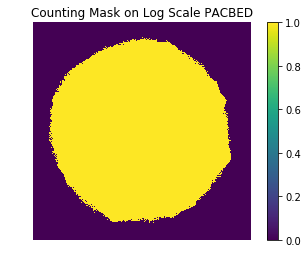

In [4]:
PACBED_counting = np.sum(np.sum(Datacube_counting,axis=0),axis=0)
mask = np.heaviside(log(PACBED_counting/22500)-2.0,1)
mask[isnan(mask)] = 0
plt.imshow(mask*log(PACBED_counting))
plt.imshow(mask)
plt.title('Counting Mask on Log Scale PACBED')
plt.axis('off')
plt.colorbar()

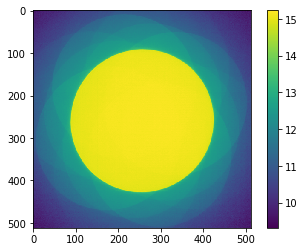

In [5]:
plt.imshow(log(PACBED_counting))
plt.colorbar()

In [25]:
# axes are arranged in the order of row, col, layer
windowsize = 2
total_row = 150
total_col = 150
stack = np.zeros((total_row, total_col,1))

for irow in range(total_row // windowsize - 1):
    for icol in range(total_col // windowsize - 1):
        
        offset_row = irow * windowsize
        offset_col = icol * windowsize
        if np.sum(mask[offset_row:offset_row+windowsize,offset_col:offset_col+windowsize] < windowsize*windowsize*0.8):
            layer = np.sum(np.sum(Datacube_counting[:,:,offset_row:offset_row + windowsize,
                                           offset_col:offset_col + windowsize],axis=2),axis=2)
            layer = np.expand_dims(layer,axis=2)
            stack = np.concatenate((stack,layer),axis=2)
            
np.save('/srv/home/chenyu/DEbackup/022119/S5/CountingStack_'+str(windowsize)+'px.npy',stack[:,:,1:-1])
            
# plt.figure(figsize=(8,8))
# plt.imshow(np.sum(np.sum(Datacube_counting[:,:,offset_row:offset_row + windowsize,
#                                            offset_col:offset_col + windowsize],axis=2),axis=2))
# plt.colorbar()
# plt.axis('off')

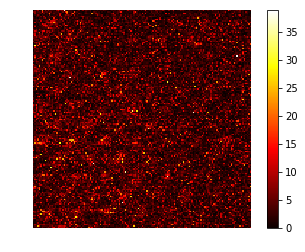

In [31]:
stack = np.load('/srv/home/chenyu/DEbackup/022119/S5/CountingStack_10px.npy')
plt.imshow(stack[:,:,100]/37.79,cmap='hot')
plt.axis('off')
plt.colorbar()

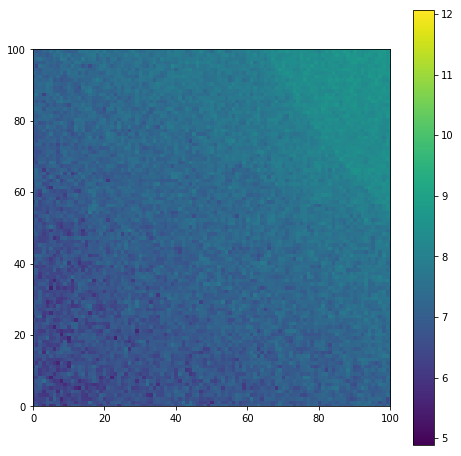

In [53]:
plt.figure(figsize=(8,8))
plt.imshow(log(np.sum(np.sum(Datacube_counting[0:30,0:30,:,:],axis=0),axis=0)))
plt.xlim((0,100))
plt.ylim((0,100))
plt.colorbar()

In [ ]:
# Generate stacks for NLPCA with selected window size
windowsize = 10